In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
from IPython.display import display

In [2]:
data = pd.read_csv('./../data/raw/conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


## Baseline:  Only total_pages_visited taken into account

In [3]:
num_attributes = ['total_pages_visited']
target_label = ['converted']
X = data.drop(target_label, axis=1)[num_attributes]
y = data.loc[:, target_label]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Verifying we have the same proportion of conversion rates than original dataset
y.value_counts()*100/y.shape[0]

converted
0            96.774194
1             3.225806
dtype: float64

### LogisticRegression with default parameters

In [6]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train.values.ravel())
log_reg.score(X_train, y_train)

0.9829178087005411

In [7]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train, log_reg.predict(X_train))
print(type(conf_matrix))
conf_matrix

<class 'numpy.ndarray'>


array([[219376,    966],
       [  2923,   4399]])

In [8]:
def labels_conf_matrix(conf_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    return labels

In [9]:
labels =labels_conf_matrix(conf_matrix)

### Confusion matrix

In [10]:
import seaborn as sns

<AxesSubplot:>

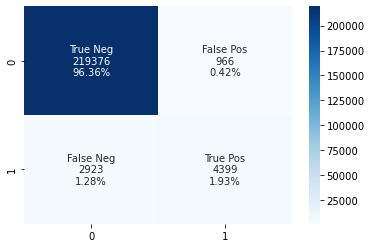

In [11]:
sns.heatmap(conf_matrix, annot=labels,fmt='', cmap='Blues')

### Metrics: precision, recall, f1

In [12]:
def predict_compare(model, X, y_true):
    y_pred = model.predict(X)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return precision, recall, f1

In [13]:
p, r, f1 = predict_compare(log_reg, X_train, y_train)
print('**Train***')
print('Precision={}'.format(p))
print('Recall={}'.format(r))
print('f1_score={}'.format(f1))
p, r, f1 = predict_compare(log_reg, X_test, y_test)
print('**Test***')
print('Precision={}'.format(p))
print('Recall={}'.format(r))
print('f1_score={}'.format(f1))


**Train***
Precision=0.8199440820130476
Recall=0.6007921332969134
f1_score=0.69346575234492
**Test***
Precision=0.8290535583272194
Recall=0.6081808396124866
f1_score=0.7016454517230675


In [15]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}